In [1]:
import os.path
import zipfile

UNEXTRACT_DATA = "data/laptopPrices.zip"
EXTRACTION_FOLDER = "data/extractedData"

def fetch_data(extraction_dir, unextract_data):
    try:
        with zipfile.ZipFile(unextract_data, 'r' ) as zip_ref:
            zip_ref.extractall(extraction_dir)
    except Exception as e:
        print(f"An error has occurred: {str(e)}")

fetch_data(EXTRACTION_FOLDER, UNEXTRACT_DATA)


In [2]:
import os
import pandas as pd
def load_laptop_data(laptop_data=EXTRACTION_FOLDER):
    csv_path = os.path.join(laptop_data, "laptops_train.csv")
    return pd.read_csv(csv_path)
laptop_pricing= load_laptop_data()
laptop_pricing.head(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,10303160.40
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00


In [3]:
laptop_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


array([[<Axes: title={'center': 'Price'}>]], dtype=object)

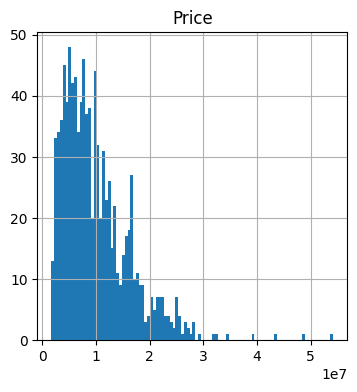

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
laptop_pricing.hist(bins=100, figsize=(4, 4))

In [5]:
import numpy as np

def split_training_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set, test_set = split_training_data(laptop_pricing, 0.2)

In [7]:
print(len(train_set))
print(len(test_set))

782
195


In [8]:
missing_data = laptop_pricing.isnull()
print(missing_data)

     Manufacturer  Model Name  Category  Screen Size  Screen    CPU    RAM  \
0           False       False     False        False   False  False  False   
1           False       False     False        False   False  False  False   
2           False       False     False        False   False  False  False   
3           False       False     False        False   False  False  False   
4           False       False     False        False   False  False  False   
..            ...         ...       ...          ...     ...    ...    ...   
972         False       False     False        False   False  False  False   
973         False       False     False        False   False  False  False   
974         False       False     False        False   False  False  False   
975         False       False     False        False   False  False  False   
976         False       False     False        False   False  False  False   

     Storage    GPU  Operating System  Operating System Version

In [9]:
missing_count = missing_data.sum()
print(laptop_pricing.columns)

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')


In [10]:
columns_to_delete = ["Operating System","Operating System Version" ];
laptop_pricing.drop(columns=columns_to_delete, inplace=True)

In [11]:
laptop_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  977 non-null    object 
 1   Model Name    977 non-null    object 
 2   Category      977 non-null    object 
 3   Screen Size   977 non-null    object 
 4   Screen        977 non-null    object 
 5   CPU           977 non-null    object 
 6   RAM           977 non-null    object 
 7   Storage       977 non-null    object 
 8   GPU           977 non-null    object 
 9   Weight        977 non-null    object 
 10  Price         977 non-null    float64
dtypes: float64(1), object(10)
memory usage: 84.1+ KB


In [17]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier))&0xffffffff<test_ratio*2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

laptops_with_id= laptop_pricing.reset_index()
train_set, test_set = split_train_test_by_id(laptops_with_id, 0.2, 'index')

In [16]:

laptops_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         977 non-null    int64  
 1   Manufacturer  977 non-null    object 
 2   Model Name    977 non-null    object 
 3   Category      977 non-null    object 
 4   Screen Size   977 non-null    object 
 5   Screen        977 non-null    object 
 6   CPU           977 non-null    object 
 7   RAM           977 non-null    object 
 8   Storage       977 non-null    object 
 9   GPU           977 non-null    object 
 10  Weight        977 non-null    object 
 11  Price         977 non-null    float64
dtypes: float64(1), int64(1), object(10)
memory usage: 91.7+ KB


In [18]:
laptops_with_id.head(12)

,index,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Weight,Price
0,0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,1.37kg,11912523.48
1,1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,1.34kg,7993374.48
2,2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,1.86kg,5112900.00
3,3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,1.83kg,22563005.40
4,4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1.37kg,16037611.20
5,5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,2.1kg,3556800.00
6,6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,2.04kg,19028613.24
7,7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,1.34kg,10303160.40
8,8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,1.3kg,13293540.00
9,9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,1.6kg,6846840.00


In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(laptop_pricing, test_size=0.2, random_state=42)